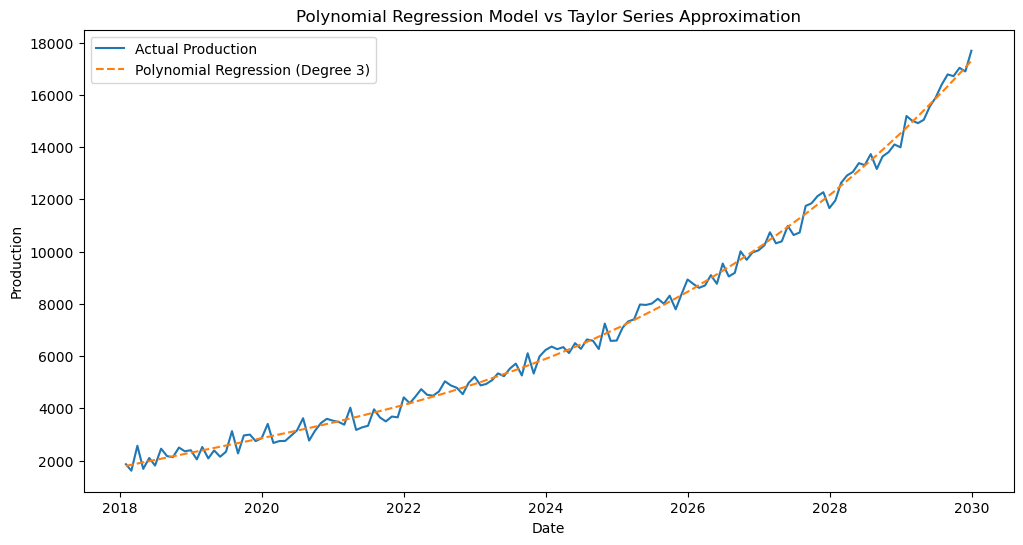

Mean Absolute Error (MAE): 245.30392202818823
Root Mean Square Error (RMSE): 288.43565486960665
EGIER needs to start building the new warehouse by: 2016-12-01 00:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data from M1 to M144
data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933, 
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 
    16388, 16782, 16716, 17033, 16896, 17689
]

# Create a date range for the data
date_range = pd.date_range(start='2018-01-01', periods=len(data), freq='M')

# Create the DataFrame
df = pd.DataFrame(data, index=date_range, columns=['Production'])

# Create the independent variable (months)
X = np.arange(len(data)).reshape(-1, 1)  # Months as independent variable
y = np.array(data)  # Production as dependent variable

# Fit a polynomial regression model
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Extract the coefficients
beta_0 = model.intercept_
beta_1, beta_2, beta_3 = model.coef_[1:]

# Polynomial model
def polynomial_model(x):
    return beta_0 + beta_1 * x + beta_2 * x**2 + beta_3 * x**3

# Numerical approximation using Taylor series at x=0
# For a polynomial of degree 3, the Taylor series at x=0 is the same polynomial
def taylor_series_approximation(x):
    return polynomial_model(x)

# Predictions
y_pred = taylor_series_approximation(X.flatten())

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, y, label='Actual Production')
plt.plot(df.index, y_pred, label='Polynomial Regression (Degree 3)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Polynomial Regression Model vs Taylor Series Approximation')
plt.legend()
plt.show()

# Calculate accuracy metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')

# Prediction for warehouse capacity
max_capacity = 25000

# Find when production exceeds max capacity
months_needed = 13
threshold_month = np.argmax(y_pred > max_capacity)

# Calculate the month to start building the new warehouse
start_building_month = threshold_month - months_needed

# Convert the start month to a date
start_building_date = pd.Timestamp('2018-01-01') + pd.DateOffset(months=start_building_month)

print(f'EGIER needs to start building the new warehouse by: {start_building_date}')
